In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    f1_score,
    accuracy_score,
)
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset
file_path = "mushrooms.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [3]:
# Prepare the data for training and testing
X = df.drop(["class", "veil-type"], axis=1)  # Features
y = df["class"]  # Target variable

# Perform one-hot encoding on categorical features
X = pd.get_dummies(X)
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.99, random_state=42
)

# Print the sizes of the training and test sets
print("Train and test sample sizes:", X_train.shape, X_test.shape)

Train and test sample sizes: (81, 116) (8043, 116)


In [5]:
# Create and train the Random Forest Classification Model
rf = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42).fit(X_train, y_train)

# Predict the test set results
y_pred = rf.predict(X_test)

In [6]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4096   64]
 [  61 3822]]


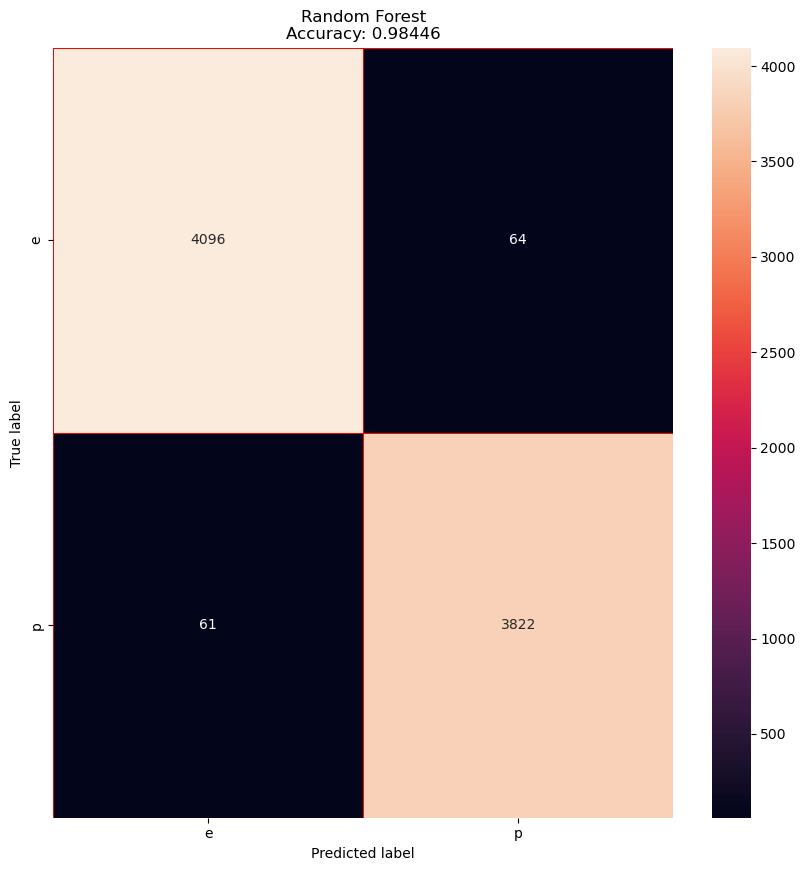

In [7]:
# Transform the confusion matrix to a DataFrame for easier plotting
cm_df = pd.DataFrame(cm, index=["e", "p"], columns=["e", "p"])

# Plot the confusion matrix as a heatmap
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_df, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.title(f"Random Forest\nAccuracy: {accuracy_score(y_test, y_pred):.5f}")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [8]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate the F1 score and store it in a variable
f1 = f1_score(y_test, y_pred, pos_label="e")

# Print the F1 score
print("F1 Score:", f1)

              precision    recall  f1-score   support

           e       0.99      0.98      0.98      4160
           p       0.98      0.98      0.98      3883

    accuracy                           0.98      8043
   macro avg       0.98      0.98      0.98      8043
weighted avg       0.98      0.98      0.98      8043

F1 Score: 0.9849705422628353
